In [140]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import pairwise_distances
import plotly.express as px
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


import joblib
import warnings
warnings.filterwarnings(action='ignore') 

In [141]:
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
# display(HTML("<style>.prompt { display:none !important; }</style>"))

### Load Data & EDA

In [142]:
train_data = pd.read_csv("./dataset/train_data.csv")

In [143]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   out_pressure   2463 non-null   float64
 3   motor_current  2463 non-null   float64
 4   motor_rpm      2463 non-null   int64  
 5   motor_temp     2463 non-null   float64
 6   motor_vibe     2463 non-null   float64
 7   type           2463 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 154.1 KB


In [144]:
train_data.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386,2.230113
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000


In [145]:
# train_data.profile_report()

In [146]:
X_train = train_data.iloc[:,:-1]
y_train = train_data[['type']]

In [147]:
X_train.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000


In [148]:
X_train.columns

Index(['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe'],
      dtype='object')

### Scaling

In [149]:
sc = StandardScaler()
# sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)

In [150]:
X_train_sc[0]

array([-4.48257396e-01, -9.17212397e-01, -1.11022302e-16, -5.11748204e-01,
       -1.00704610e+00, -9.10351446e-01, -3.31821181e-01])

In [151]:
scaled_df = pd.DataFrame(X_train_sc, columns=X_train.columns)
scaled_df.head(3)

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
0,-0.448257,-0.917212,-1.110223e-16,-0.511748,-1.007046,-0.910351,-0.331821
1,0.699749,1.178320,-1.110223e-16,0.802045,1.118785,1.172883,0.188462
2,-0.182053,-0.425427,-1.110223e-16,-0.202966,-0.508305,-0.421612,-0.211268


In [152]:
scaled_df.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
count,2.463000e+03,2.463000e+03,2.463000e+03,2.463000e+03,2.463000e+03,2.463000e+03,2.463000e+03
mean,-1.615526e-16,8.654601e-16,-1.110223e-16,-6.923681e-17,-1.038552e-16,-1.044322e-15,-5.942826e-16
std,1.000203e+00,1.000203e+00,0.000000e+00,1.000203e+00,1.000203e+00,1.000203e+00,1.000203e+00
min,-1.496437e+00,-1.945491e+00,-1.110223e-16,-1.628509e+00,-1.703539e+00,-1.976342e+00,-9.409328e-01
25%,-7.061429e-01,-8.484312e-01,-1.110223e-16,-7.631849e-01,-8.550972e-01,-8.487780e-01,-3.635457e-01
50%,-1.404585e-01,-2.423025e-03,-1.110223e-16,-1.206245e-01,-2.119569e-02,-1.625376e-02,-1.224390e-01
75%,5.749659e-01,8.430120e-01,-1.110223e-16,6.255983e-01,8.701410e-01,8.348708e-01,1.757719e-01
max,3.403388e+00,1.829448e+00,-1.110223e-16,3.272300e+00,1.732397e+00,1.892523e+00,1.168544e+01


### Correlation Review
- PCA 차원축소릃 할 때, 강한 상관관계를 갖는 속성끼리 묶어서 수행하겠다.
- 차원축소 그룹핑
-- 1그룹 : air_inflow, motor_current, motor_vibe
-- 2그룹 : air_end_temp, motor_rpm, motor_temp
-- 3그룹 : out_pressure
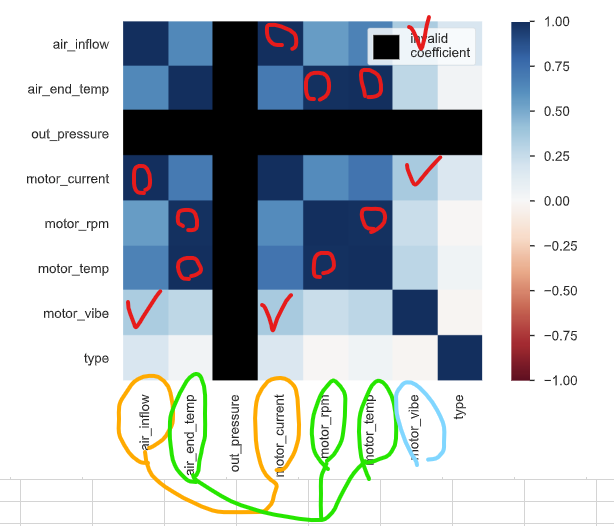

In [153]:
# PCA 대상 그룹핑으로 나누기
g1 = scaled_df[['air_inflow','motor_current', 'motor_vibe']]
g2 = scaled_df[['air_end_temp', 'motor_rpm', 'motor_temp']]
g3 = scaled_df[['out_pressure']]
combined = [g1, g2, g3]

### PCA Decomposition

In [154]:
pca = PCA(n_components=1)
pca_list = []
for i in combined:
    result = pca.fit_transform(i)
    pca_list.append(result)
    total_var = pca.explained_variance_ratio_.sum() * 100
    print(f"{i}total_var : {total_var}")

      air_inflow  motor_current  motor_vibe
0      -0.448257      -0.511748   -0.331821
1       0.699749       0.802045    0.188462
2      -0.182053      -0.202966   -0.211268
3       0.200616       0.230799   -0.039955
4      -0.190372      -0.208848   -0.211268
...          ...            ...         ...
2458    0.125746       0.149927   -0.071680
2459   -0.073907      -0.084600   -0.160509
2460   -0.781013      -0.889638   -0.477754
2461   -0.764375      -0.871259   -0.471409
2462    0.491777       0.566048    0.093288

[2463 rows x 3 columns]total_var : 73.31059716184465
      air_end_temp  motor_rpm  motor_temp
0        -0.917212  -1.007046   -0.910351
1         1.178320   1.118785    1.172883
2        -0.425427  -0.508305   -0.421612
3         0.266970   0.194005    0.265958
4        -0.434598  -0.517029   -0.430592
...            ...        ...         ...
2458      0.137432   0.063140    0.137680
2459     -0.236279  -0.316369   -0.234326
2460     -1.520194  -1.619204   -1.51069

In [155]:
pca_list[0]

array([[-0.75412323],
       [ 1.05346896],
       [-0.33230288],
       ...,
       [-1.27429267],
       [-1.24898419],
       [ 0.72696897]])

In [156]:
# 2D 리스트를 1D로 Flatten
flat_pca_list = []
for i in pca_list:
    result = [j for sub in i for j in sub]
    flat_pca_list.append(result)

In [157]:
# flat_pca_list[0]

In [158]:
pca_df = pd.DataFrame({"PC1": flat_pca_list[0], "PC2": flat_pca_list[1], "PC3": flat_pca_list[2]})
pca_df.head()

,PC1,PC2,PC3
0,-0.754123,1.636428,0.0
1,1.053469,-2.003479,0.0
2,-0.332303,0.782386,0.0
3,0.266696,-0.419799,0.0
4,-0.341582,0.797902,0.0


In [159]:
y_train.head()

,type
0,0
1,0
2,0
3,0
4,0


In [160]:
pca_train = pd.concat([pca_df, y_train], axis=1)
pca_train.head()

,PC1,PC2,PC3,type
0,-0.754123,1.636428,0.0,0
1,1.053469,-2.003479,0.0,0
2,-0.332303,0.782386,0.0,0
3,0.266696,-0.419799,0.0,0
4,-0.341582,0.797902,0.0,0


In [161]:
pca_train.describe()

,PC1,PC2,PC3,type
count,2463.000000,2.463000e+03,2463.0,2463.000000
mean,0.000000,3.461840e-17,0.0,2.957369
std,1.483311,1.727823e+00,0.0,2.230113
min,-2.401587,-3.143376e+00,0.0,0.000000
25%,-1.102788,-1.470500e+00,0.0,1.000000
50%,-0.204299,1.809767e-02,0.0,3.000000
75%,0.882926,1.462356e+00,0.0,5.000000
max,4.781087,3.247327e+00,0.0,7.000000


In [162]:
fig = px.scatter_3d(
    pca_train, x='PC1', y='PC2', z='PC3', color='type',symbol='type', opacity=0.5, size_max=10,height=600,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### DBSCAN

In [163]:
X_train = pca_train.iloc[:,:-1]
y_train = pca_train[['type']]

In [164]:
dbscan = DBSCAN(eps=0.1, min_samples=10)
labels = dbscan.fit_predict(X_train)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [165]:
# dbscan.labels_

In [166]:
# dbscan.core_sample_indices_, len(dbscan.core_sample_indices_)

In [167]:
X_train['label'] = labels
X_train.head(3)

,PC1,PC2,PC3,label
0,-0.754123,1.636428,0.0,0
1,1.053469,-2.003479,0.0,0
2,-0.332303,0.782386,0.0,0


In [168]:
sil_score = silhouette_score(X_train, labels)
sil_score

0.27419950272043797

In [169]:
X_train = pd.concat([X_train, y_train], axis=1)
X_train.head()

,PC1,PC2,PC3,label,type
0,-0.754123,1.636428,0.0,0,0
1,1.053469,-2.003479,0.0,0,0
2,-0.332303,0.782386,0.0,0,0
3,0.266696,-0.419799,0.0,0,0
4,-0.341582,0.797902,0.0,0,0


In [170]:
X_train['label'].value_counts()

 0     1422
 1      173
 7      152
-1      117
 3       68
 8       56
 12      48
 9       44
 2       41
 11      27
 20      26
 14      26
 4       22
 15      22
 13      21
 10      16
 18      16
 24      16
 5       16
 23      14
 16      14
 17      14
 6       13
 19      13
 28      12
 21      11
 22      11
 25      11
 26      11
 27      10
Name: label, dtype: int64

In [171]:
fig = px.scatter_3d(
    X_train, x='PC1', y='PC2', z='PC3', color='label',symbol='type', opacity=0.5, size_max=10,height=600,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [172]:
X_train.describe().round(2)

,PC1,PC2,PC3,label,type
count,2463.00,2463.00,2463.0,2463.00,2463.00
mean,0.00,0.00,0.0,3.39,2.96
std,1.48,1.73,0.0,6.36,2.23
min,-2.40,-3.14,0.0,-1.00,0.00
25%,-1.10,-1.47,0.0,0.00,1.00
50%,-0.20,0.02,0.0,0.00,3.00
75%,0.88,1.46,0.0,5.00,5.00
max,4.78,3.25,0.0,28.00,7.00


### Save Model

In [173]:
joblib.dump(dbscan, './models/dbscan.joblib')

['./models/dbscan.joblib']